In [170]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
import hopsworks
import pandas as pd

In [172]:
project = hopsworks.login()
fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/226452
Connected. Call `.close()` to terminate connection gracefully.


In [173]:
project = hopsworks.login()
fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/226452
Connected. Call `.close()` to terminate connection gracefully.


In [174]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186)
  
# data (as pandas dataframes) 
wine_X = wine_quality.data.features 
wine_y = wine_quality.data.targets
wine_df = pd.concat([wine_X, wine_y], axis=1)

#wine_quality = pd.read_csv('wine+quality/winequality-red.csv')


In [175]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [176]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [183]:
wine_df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### Exploratory Data Analysis (EDA)  our Iris Data

Let's look at the wine features - the distribution and range of values for the 10 different attributes
 
 and the target variable is `quality`.

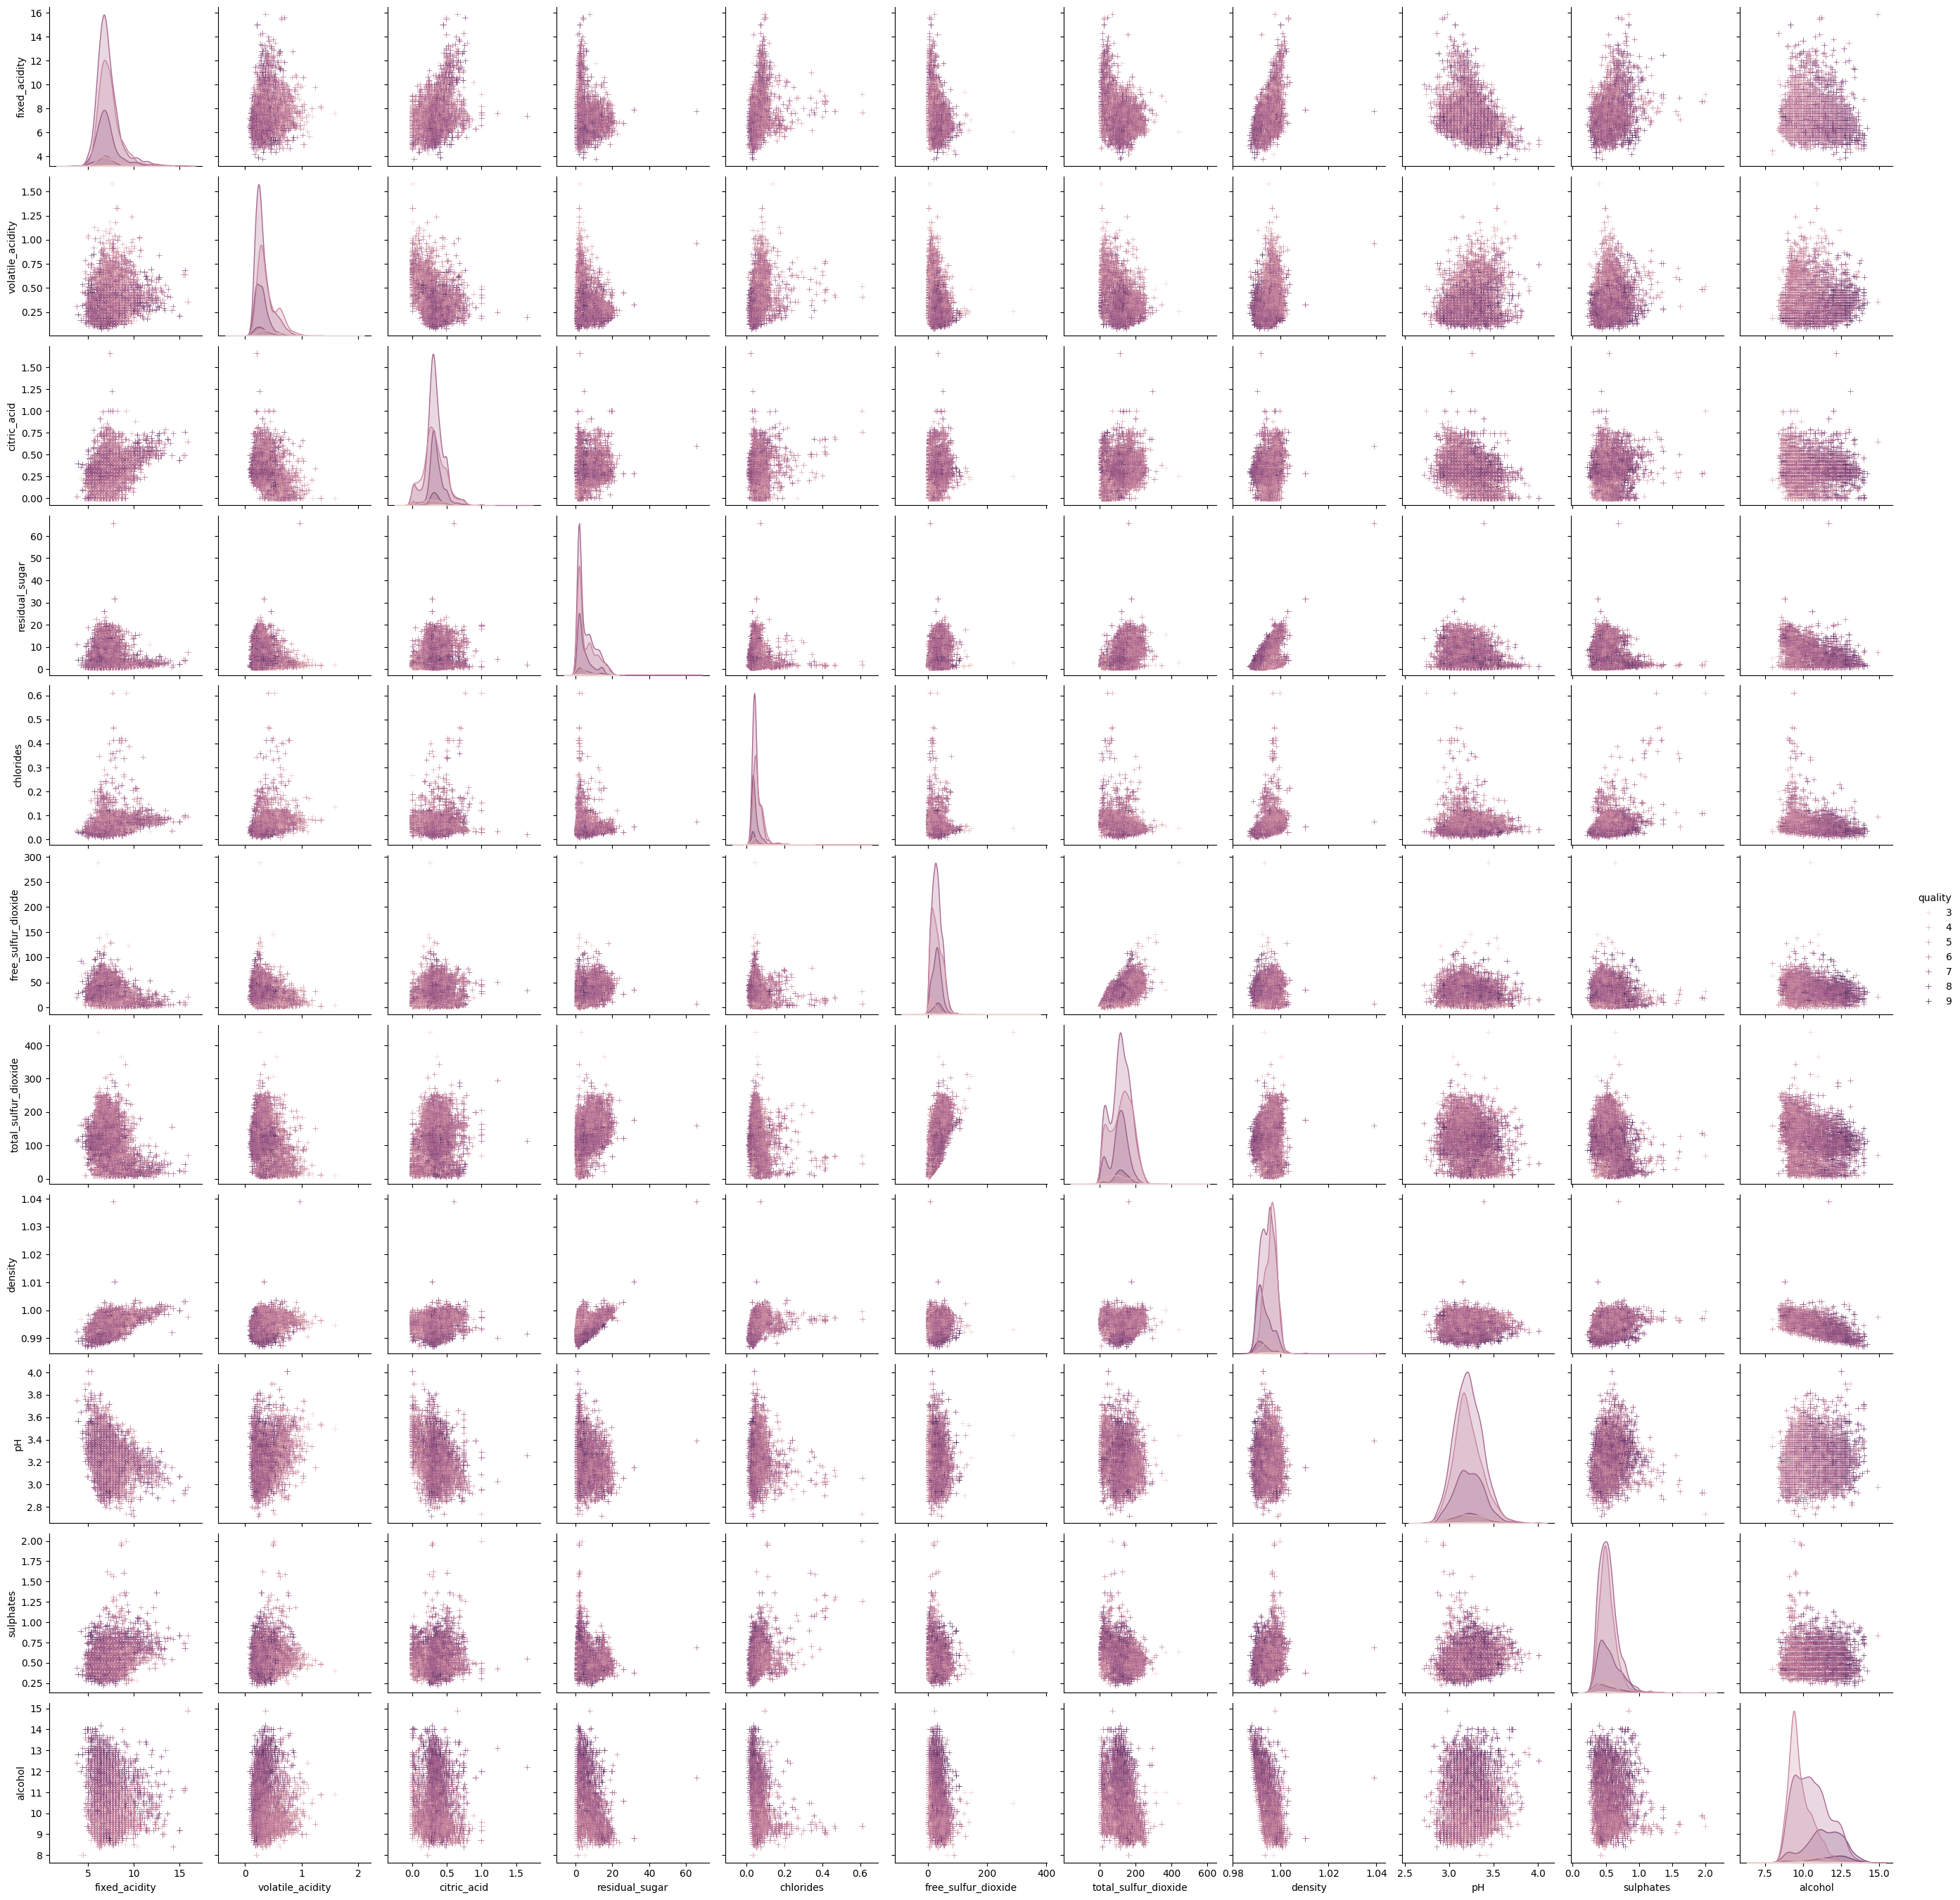

In [178]:
g = sns.pairplot(wine_df, hue='quality', markers='+')
plt.show()

In [179]:
'''import ppscore as pps
for feature in wine_features:
    pps.score(wine_df, feature, 'quality')
    pps.predictors(wine_df, 'quality')
    pps.matrix(wine_df)
matrix_df = pps.matrix(wine_df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)'''
grouped_by_quality = wine_df.groupby('quality')
grouped_by_quality.quantile([0.1, 0.9])
#df_loc = grouped_by_quality[:, ~grouped_by_quality.isin(['fixed_acidity', 'chlorides'])]

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
quality                                                                     
3       0.1           6.10            0.2285        0.018            1.20   
        0.9          10.40            0.9840        0.461           11.50   
4       0.1           6.00            0.2250        0.030            1.15   
        0.9           9.05            0.7825        0.490           10.50   
5       0.1           6.10            0.2100        0.100            1.40   
        0.9           8.90            0.6500        0.500           13.60   
6       0.1           5.90            0.1700        0.170            1.30   
        0.9           8.60            0.5300        0.490           13.00   
7       0.1           5.80            0.1600        0.240            1.40   
        0.9           8.72            0.4400        0.490           11.60   
8       0.1           5.40            0.1600        0.250            1.40   
        0.9           7.90            0.4500        0.460           13.90   
9       0.1           6.72            0.2480        0.310            1.76   
        0.9           8.42            0.3600        0.474            8.04   

             chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
quality                                                                       
3       0.1     0.0339                 5.00                 13.80  0.991590   
        0.9     0.1505               119.05                235.05  0.999430   
4       0.1     0.0340                 5.00                 21.50  0.991290   
        0.9     0.0880                40.50                189.00  0.998000   
5       0.1     0.0370                 8.00                 30.00  0.992420   
        0.9     0.0960                57.00                197.00  0.998800   
6       0.1     0.0310                10.00                 31.00  0.990660   
        0.9     0.0830                54.00                186.00  0.998355   
7       0.1     0.0280                11.00                 28.00  0.989640   
        0.9     0.0720                49.00                166.20  0.997920   
8       0.1     0.0270                15.00                 73.20  0.989420   
        0.9     0.0570                53.00                169.00  0.997540   
9       0.1     0.0192                25.20                 96.20  0.989710   
        0.9     0.0338                46.60                133.00  0.994420   

                pH  sulphates  alcohol  
quality                                 
3       0.1  2.927      0.370     8.95  
        0.9  3.532      0.631    11.52  
4       0.1  3.015      0.345     9.00  
        0.9  3.490      0.645    11.50  
5       0.1  3.020      0.380     9.00  
        0.9  3.420      0.680    11.00  
6       0.1  3.020      0.370     9.20  
        0.9  3.420      0.720    12.20  
7       0.1  3.020      0.370     9.60  
        0.9  3.420      0.770    12.80  
8       0.1  3.012      0.330     9.80  
        0.9  3.418      0.758    13.00  
9       0.1  3.232      0.384    11.20  
        0.9  3.394      0.558    12.82

### Visualize range of values 

We want to design a simulator generate the quality of the wine depending on its features. of iris flower (setosa, versicolor, virginica).
To do this, we can visualize the range of quality for the different featuers.

2023-11-22 00:42:38,959 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-22 00:42:38,965 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


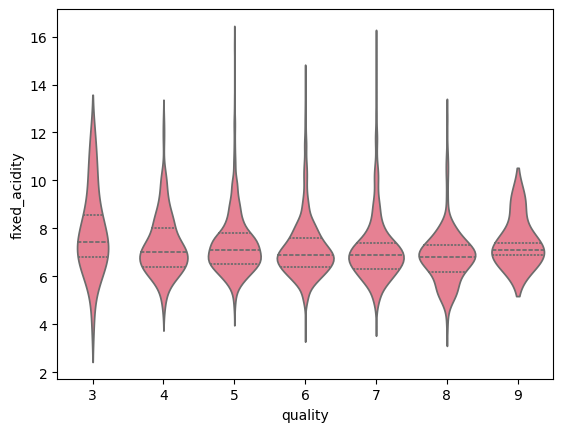

2023-11-22 00:42:39,062 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-22 00:42:39,069 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


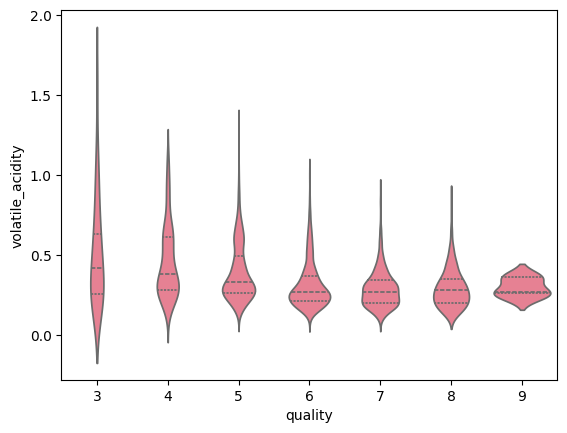

2023-11-22 00:42:39,191 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-22 00:42:39,197 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


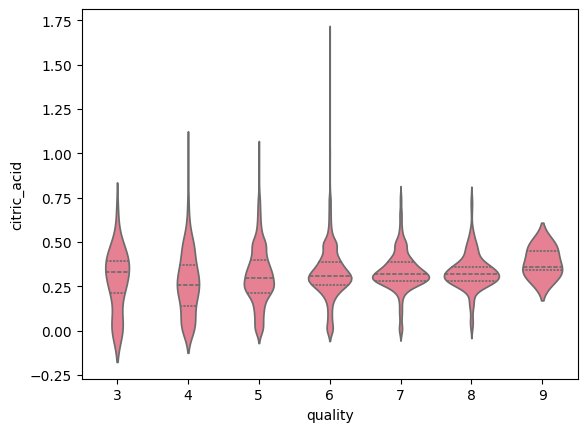

2023-11-22 00:42:39,289 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-22 00:42:39,294 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


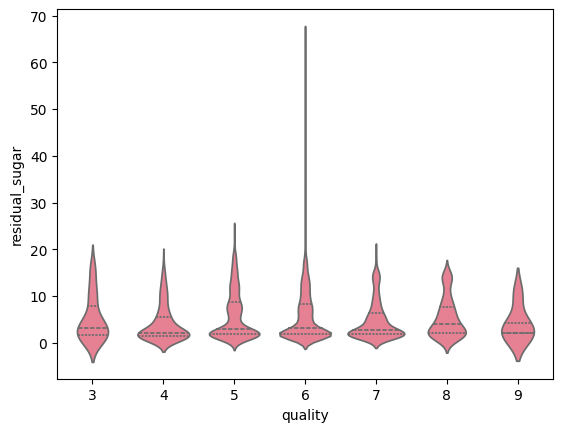

2023-11-22 00:42:39,391 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-22 00:42:39,397 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


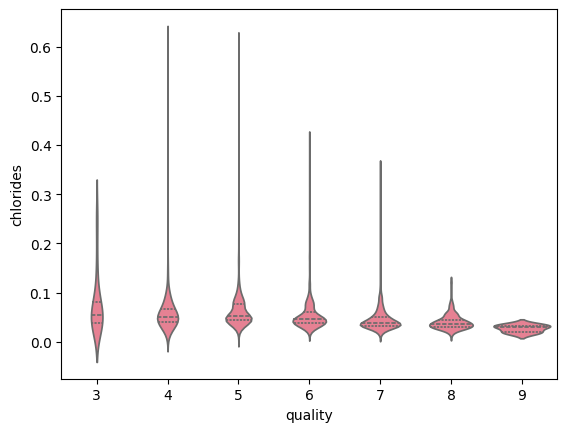

2023-11-22 00:42:39,494 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-22 00:42:39,499 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


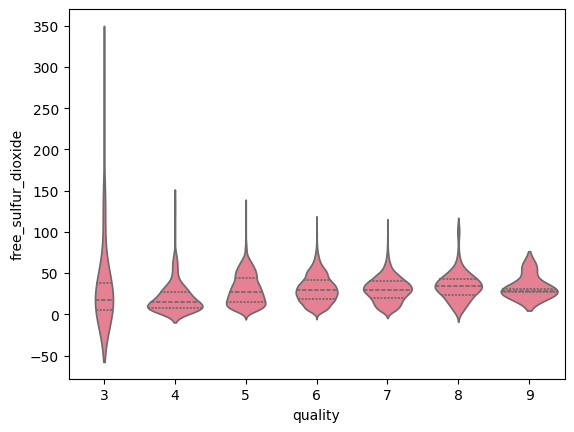

2023-11-22 00:42:39,591 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-22 00:42:39,598 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


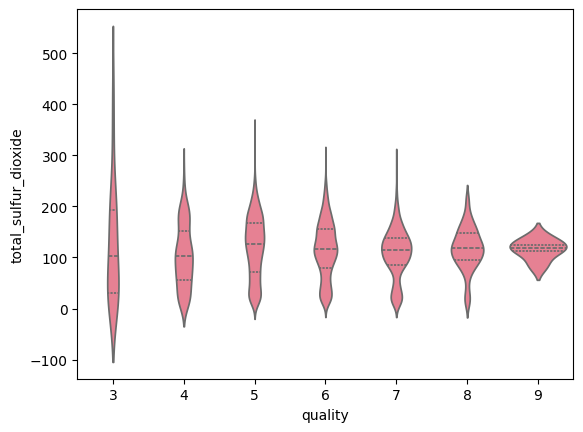

2023-11-22 00:42:39,695 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-22 00:42:39,700 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


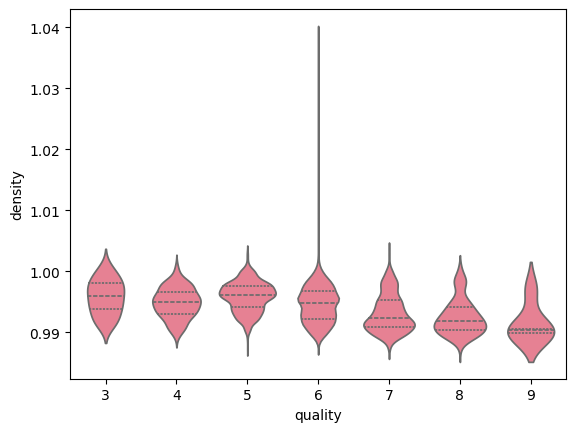

2023-11-22 00:42:39,785 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-22 00:42:39,791 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


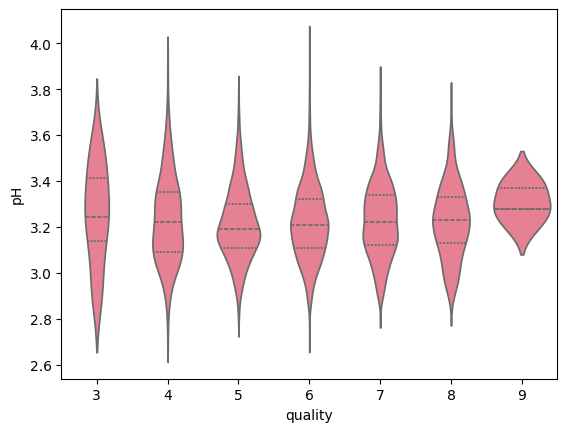

2023-11-22 00:42:39,880 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-22 00:42:39,885 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


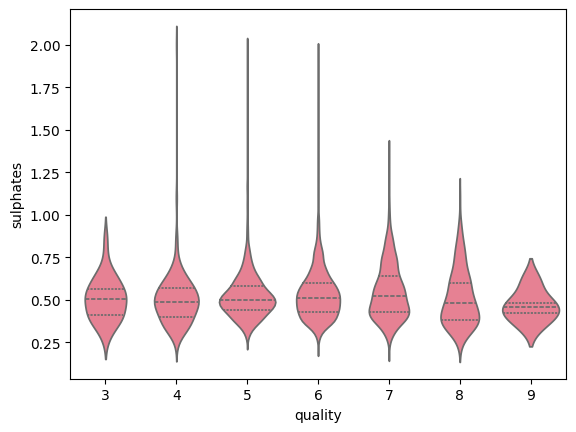

2023-11-22 00:42:39,974 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-22 00:42:39,980 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


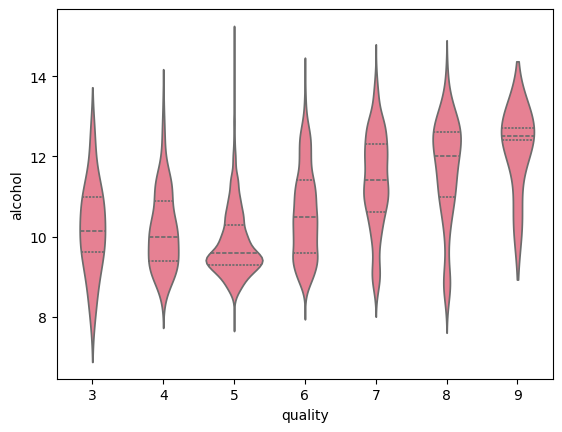

In [180]:
wine_features = list(wine_X)
for feature in wine_features:
    g = sns.violinplot(x='quality', y=feature, data=wine_df, inner='quartile')
    plt.show()

### Insert the Wine DataFrame into a FeatureGroup
Let's write the historical wine feature values and labels to a feature group.
When you write historical data, this process is called `backfilling`.

In [181]:
wine_df_loc = wine_df.loc[:, ~wine_df.columns.isin(['fixed_acidity', 'residual_sugar', 'chlorides', 'density', 'pH', 'sulphates'])]
wine_features_loc = list(wine_df_loc)
wine_features_loc

['volatile_acidity',
 'citric_acid',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'alcohol',
 'quality']

In [182]:
wine_fg = fs.get_or_create_feature_group(
    name="wine_updated3",
    version=1,
    primary_key=wine_features_loc, 
    description="Wine quality dataset with 5 features")
wine_fg.insert(wine_df_loc)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/226452/fs/226371/fg/243095


Uploading Dataframe: 0.00% |          | Rows 0/6497 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wine_updated3_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/226452/jobs/named/wine_updated3_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x1787fa220>, None)

### Data Validation
If you want, you can enable data validation for your feature group.
The code below will prevent iris flower data from being written your your feature group if you write values outside the expected ranges.